In [ ]:
import numpy as np
import random
from MOEAD import MOEAD
from Problem import ZDT1, ZDT2, ZDT3, ZDT4, UF6

seed = 42 # seed
np.random.seed(seed), random.seed(seed)
n_var = 10 # 設計変数
problem = UF6(n_var=n_var) # 問題
pop_size = 1000 # 個体数
n_gen = 10000 # 世代数
n_neighbors = int(pop_size / 10)

# 初期解
population = problem.generate_pop(pop_size)
#print(population)

res = MOEAD(pop_size=pop_size,
            n_neighbors=n_neighbors)
res.optimize(Problem=problem,
             population=population,
             n_gen=n_gen)

X = res.get_X() # 変数値を取得
F = res.get_F() # 関数値を取得
#print(X)
#print(F)

TypeError: slice indices must be integers or None or have an __index__ method

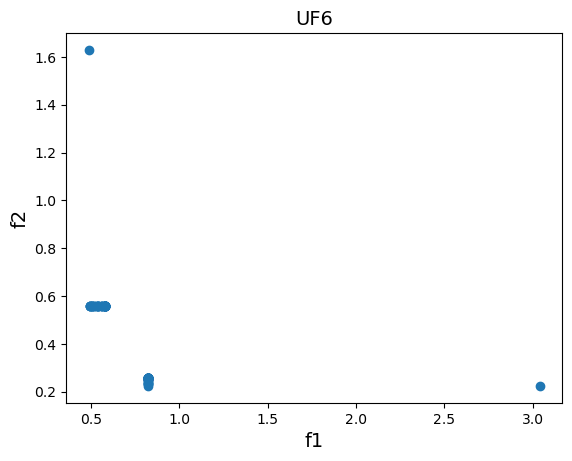

In [ ]:
# --- 散布図 ---
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("f1", fontsize=14)
plt.ylabel("f2", fontsize=14)
plt.title(problem.__class__.__name__, fontsize=14)
#plt.xlim(0,1)
#plt.ylim(-1,1.5)

plt.scatter(F[:, 0], F[:, 1])    # 全解を表示

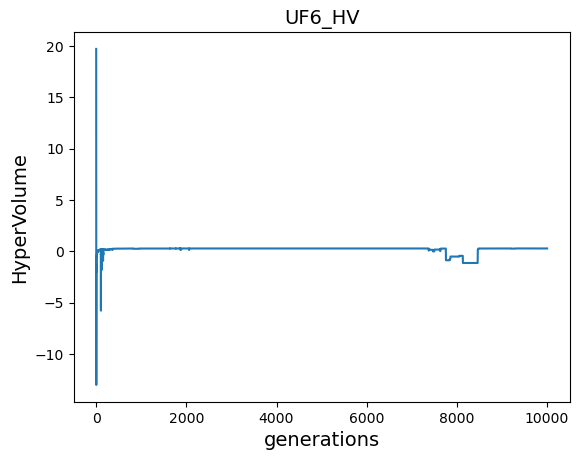

In [ ]:
# --- HVと世代数のグラフ---

HV_past = res.get_HV()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("generations", fontsize=14)
plt.ylabel("HyperVolume", fontsize=14)
plt.title(f"{problem.__class__.__name__}_HV", fontsize=14)

plt.plot(range(1, len(HV_past)+1), HV_past)